In [15]:
import pandas as pd
import numpy as np
from scipy.sparse import linalg
from sklearn.manifold import TSNE

In [4]:
names = pd.read_csv("movies.csv", usecols=["movieId", "title"], index_col="movieId")

print(names.size)
names.head()

4999


,title
movieId,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)


In [5]:
ratings = pd.read_csv("ratings.csv").pivot(index='userId', columns='movieId', values='rating').fillna(0)

print(ratings.shape)
ratings.head()

(7119, 4837)


movieId,1,2,3,4,5,6,7,8,9,10,...,5084,5085,5086,5087,5088,5089,5090,5092,5093,5094
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
genre = pd.read_csv("movies.csv", index_col=0).genres.str.get_dummies(sep='|').T

print(genre.shape)
genre.head()

(19, 4999)


movieId,1,2,3,4,5,6,7,8,9,10,...,5085,5086,5087,5088,5089,5090,5091,5092,5093,5094
Action,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,1,1
Adventure,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Animation,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Children,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Comedy,1,0,1,1,1,0,1,0,0,0,...,0,0,1,1,1,0,1,1,0,0


In [7]:
# Normalize movie ratings
ratings_norm = ratings - ratings.mean(axis=1).values.reshape(-1, 1)
genre_norm = genre - genre.mean(axis=1).values.reshape(-1, 1)

In [8]:
# Use SVD to find latent features
_, _, _rating_LS1 = linalg.svds(ratings_norm.to_numpy(), k=50)
_, _, _genre_LS1 = linalg.svds(genre_norm.to_numpy(), k=10)

In [12]:
ratings_LS1 = pd.DataFrame(_rating_LS1, columns=ratings.columns)
genre_LS1 = pd.DataFrame(_genre_LS1, columns=genre.columns)

print(ratings_LS1.shape)
ratings_LS1.head()

(50, 4837)


movieId,1,2,3,4,5,6,7,8,9,10,...,5084,5085,5086,5087,5088,5089,5090,5092,5093,5094
0,0.207487,-0.018252,-0.000938,0.021854,0.017367,-0.001356,-0.034799,-0.000958,0.007815,0.035964,...,-0.002096,-0.001515,-0.001889,-0.001257,-0.000626,-0.001834,0.000533,2.742321e-03,0.001549,0.007838
1,0.052501,0.014957,-0.013139,0.001454,-0.019743,-0.043339,-0.016463,0.001494,0.010502,0.023988,...,-0.002410,-0.000899,-0.003903,0.002552,-0.002222,-0.003853,-0.006443,-1.169593e-03,-0.010543,0.004787
2,0.071473,0.070360,-0.003894,-0.013645,-0.003734,-0.034309,-0.009264,0.005265,-0.009989,0.009283,...,0.000706,-0.000752,0.000575,-0.000420,0.000489,0.000582,0.003331,5.772991e-03,-0.004124,-0.002832
3,0.015537,0.002868,0.029456,-0.011445,0.025672,0.026056,-0.018901,0.002898,-0.002323,0.012055,...,0.001858,0.001448,0.000682,0.001050,0.001714,0.000768,-0.000062,5.396893e-07,0.003593,0.001323
4,-0.124326,-0.044332,0.006234,-0.004786,-0.003311,0.004556,0.010789,-0.001917,-0.005290,0.010461,...,-0.000109,0.002847,-0.001429,-0.002970,-0.000752,-0.001677,0.000774,-2.324916e-03,0.004667,-0.002640


In [10]:
# Function to find top k similar movies using cosine similarity
def top_k_similar_movies(data, movie, k=10):
	movie = movie[:, np.newaxis]
	# Calculate cosine similarity
	similarity = (np.dot(movie.T, data) / np.linalg.norm(data, axis=0) / np.linalg.norm(movie))[0]
	# Return top k similar movies
	idx = np.argsort(-similarity)[:k]
	movie_ids = data.columns[idx]
	# print names of recommended movies
	print("Top recommended movies are:")
	for mName in names.loc[movie_ids].title.values:
		print(mName)
	return movie_ids

def recommendMovies(data, user_id, k=10):
	# Get id of movies rated by user
	movie_ids = ratings.loc[user_id][ratings.loc[user_id] > 0].index
	# Find rating waited average of movies rated by user
	movie_rep = np.average(data.loc[:][movie_ids].values, weights=ratings.loc[user_id][movie_ids].values, axis=1)
	# Print name of highly rated movies by user
	movie_ids = sorted(movie_ids, key=lambda x: ratings.loc[user_id][x], reverse=True)
	print(f"Highly rated movies by user {user_id} are:")
	for mName in names.loc[movie_ids].title.values[:10]:
		print(mName)
	print()
	# Remove movies already rated by user
	data = data.drop(movie_ids, axis=1)
	# Get top k similar movies
	top_k_similar_movies(data, movie_rep, k)

recommendMovies(ratings_LS1, 2)

Highly rated movies by user 2 are:
Mr. Holland's Opus (1995)
From Dusk Till Dawn (1996)
Star Wars: Episode IV - A New Hope (1977)
Legends of the Fall (1994)
Jurassic Park (1993)
Blade Runner (1982)
Terminator 2: Judgment Day (1991)
2001: A Space Odyssey (1968)
Star Wars: Episode V - The Empire Strikes Back (1980)
Star Wars: Episode VI - Return of the Jedi (1983)

Top recommended movies are:
Star Wars: Episode I - The Phantom Menace (1999)
Total Recall (1990)
Terminator, The (1984)
Mad Max (1979)
Aliens (1986)
Planet of the Apes (1968)
Dune (1984)
Abyss, The (1989)
Fifth Element, The (1997)
E.T. the Extra-Terrestrial (1982)


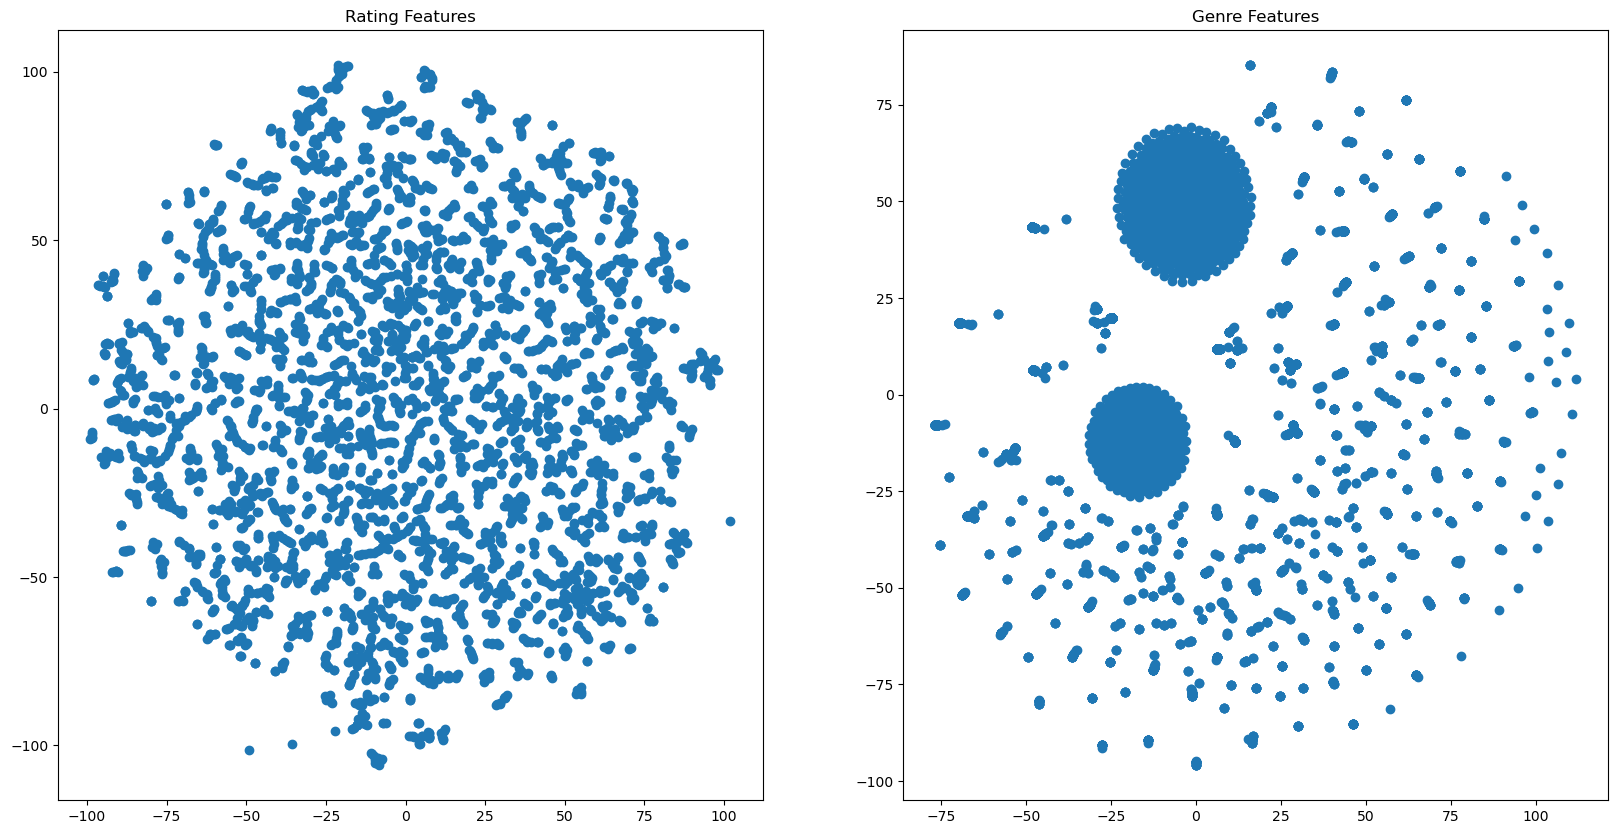

In [16]:
# Use t-SNE to visualize the latent features

#Take transpose of the latent features
rating_features = ratings_LS1.T
genre_features = genre_LS1.T

rating_points = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(rating_features)
genre_points = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(genre_features)

# Transpose the latent features

rating_points = rating_points.T
genre_points = genre_points.T

# Plot the latent features

import matplotlib.pyplot as plt
figure, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].scatter(rating_points[0], rating_points[1])
axes[0].set_title("Rating Features")
axes[1].scatter(genre_points[0], genre_points[1])
axes[1].set_title("Genre Features")
plt.savefig("latent_features.png")


# rating_points = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(rating_LS1)